In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.optimize import minimize
from sklearn.metrics import classification_report#这个包是评价报告

In [2]:
train=pd.read_csv(r'F:\h\kaggle\train.csv')
test=pd.read_csv(r'F:\h\kaggle\test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


SibSp: 兄弟姐妹及配偶个数
Parch:父母或子女个数
Ticket: 乘客的船票号
Fare: 乘客的船票价
Cabin: 乘客所在的仓位（位置）
Embarked:乘客登船口岸

In [6]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Shellard, Mr. Frederick William",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
import seaborn as sns

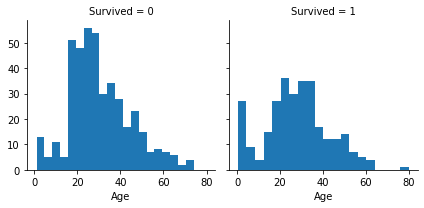

In [11]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Infants (Age <=4) had high survival rate.
Oldest passengers (Age = 80) survived.
Large number of 15-25 year olds did not survive.
Most passengers are in 15-35 age rang

c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


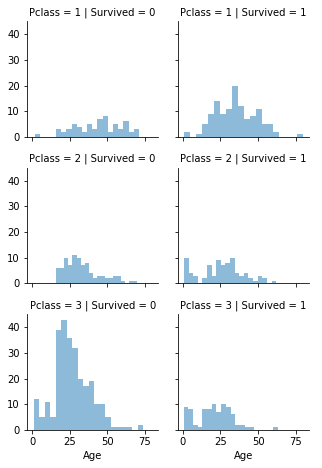

In [12]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


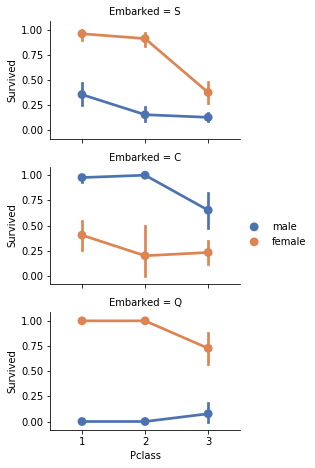

In [13]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


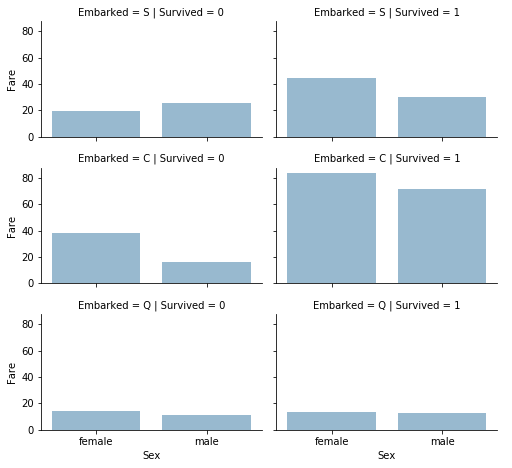

In [14]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [15]:
train= train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

In [16]:
combine = [train, test]

缺失值填充
常用方法：
平均值
经验值
回归模型预测
剔除掉

正如我们前面看到的，年龄特征有177个空值。为了替换这些缺失值，我们可以给它们分配数据集的平均年龄。但问题是，有许多不同年龄的人。最好的办法是找到一个合适的年龄段！我们可以检查名字特征。根据这个特征，我们可以看到名字有像先生或夫人这样的称呼这样我们就可以把先生和夫人的平均值分配给各自的组

In [17]:
train['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [18]:
train.groupby(['Name','Sex'])['Name'].count()

Name                                   Sex   
Abbing, Mr. Anthony                    male      1
Abbott, Mr. Rossmore Edward            male      1
Abbott, Mrs. Stanton (Rosa Hunt)       female    1
Abelson, Mr. Samuel                    male      1
Abelson, Mrs. Samuel (Hannah Wizosky)  female    1
                                                ..
de Mulder, Mr. Theodore                male      1
de Pelsmaeker, Mr. Alfons              male      1
del Carlo, Mr. Sebastiano              male      1
van Billiard, Mr. Austin Blyler        male      1
van Melkebeke, Mr. Philemon            male      1
Name: Name, Length: 891, dtype: int64

In [19]:
train['Salutation'] = train.Name.str.extract(' ([A-Za-z]+)\.',expand=False)

In [20]:
train['Salutation'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [21]:
train.groupby(['Salutation','Sex'])['Salutation'].count()

Salutation  Sex   
Capt        male        1
Col         male        2
Countess    female      1
Don         male        1
Dr          female      1
            male        6
Jonkheer    male        1
Lady        female      1
Major       male        2
Master      male       40
Miss        female    182
Mlle        female      2
Mme         female      1
Mr          male      517
Mrs         female    125
Ms          female      1
Rev         male        6
Sir         male        1
Name: Salutation, dtype: int64

In [22]:
train['Salutation']=train['Salutation'].replace(['Ms','Lady','Mme'],'Mrs')
train['Salutation']=train['Salutation'].replace('Sir','Mr')
train['Salutation']=train['Salutation'].replace('Mlle','Miss')
train['Salutation']=train['Salutation'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Major','Rev'],'other')

In [23]:
train['Salutation'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'other'], dtype=object)

In [24]:
train.groupby(['Salutation'])['Age'].mean()

Salutation
Master     4.574167
Miss      21.804054
Mr        32.409774
Mrs       35.828829
other     45.250000
Name: Age, dtype: float64

In [25]:
Salutation_mapping = {'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'other':5}


In [26]:
# train['Salutation'].map(Salutation_mapping)

In [27]:
train.loc[train['Salutation']=='Mr','Age']=32
train.loc[train['Salutation']=='Mrs','Age']=36
train.loc[train['Salutation']=='Miss','Age']=22
train.loc[train['Salutation']=='Master','Age']=4
train.loc[train['Salutation']=='other','Age']=45

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
Salutation     891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 62.7+ KB


In [29]:
train['Salutation'] = train['Salutation'].fillna(0)

c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


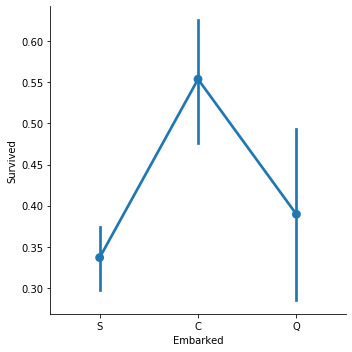

In [30]:
sns.factorplot('Embarked','Survived',data=train)
fig=plt.gcf()
plt.show()

In [31]:
train['Embarked'].fillna('S',inplace=True)

In [32]:
pd.crosstab([train.SibSp],train.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


特征工程和数据清洗

In [33]:
Salutation_mapping = {'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'other':5}#年龄是连续变量在机器学习中，需要把连续变量离散化
train['Salutation'].map(Salutation_mapping)

0      1
1      2
2      3
3      2
4      1
      ..
886    5
887    3
888    3
889    1
890    1
Name: Salutation, Length: 891, dtype: int64

In [34]:
#家庭的人数
train['family_size'] = train['SibSp']+train['Parch']+1

In [35]:
#船票的价格


In [36]:
train['FareBand'] = pd.qcut(train['Fare'], 4)

In [37]:
train['FareBand'].unique()

[(-0.001, 7.91], (31.0, 512.329], (7.91, 14.454], (14.454, 31.0]]
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [38]:

train.loc[train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare']>7.91)&(train['Fare']<=14.454),'Fare']=1
train.loc[(train['Fare']>14.454)&(train['Fare']<=31.0),'Fare']=2
train.loc[(train['Fare']>31.0)&(train['Fare']<=512.329),'Fare']=3

In [39]:
train.drop(['PassengerId','Name','SibSp','Parch','FareBand','Age'],axis=1,inplace=True)

In [40]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)


In [41]:
train['Embarked'].replace(['C','S','Q'],[0,1,2],inplace=True)

In [42]:
train

,Survived,Pclass,Sex,Fare,Embarked,Salutation,family_size
0,0,3,0,0.0,1,Mr,2
1,1,1,1,3.0,0,Mrs,2
2,1,3,1,1.0,1,Miss,1
3,1,1,1,3.0,1,Mrs,2
4,0,3,0,1.0,1,Mr,1
5,0,3,0,1.0,2,Mr,1
6,0,1,0,3.0,1,Mr,1
7,0,3,0,2.0,1,Master,5
8,1,3,1,1.0,1,Mrs,3
9,1,2,1,2.0,0,Mrs,2


In [43]:
Salutation_mapping = {'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'other':5}#年龄是连续变量在机器学习中，需要把连续变量离散化
train['Salutation'] = train['Salutation'].map(Salutation_mapping)

In [44]:
train

,Survived,Pclass,Sex,Fare,Embarked,Salutation,family_size
0,0,3,0,0.0,1,1,2
1,1,1,1,3.0,0,2,2
2,1,3,1,1.0,1,3,1
3,1,1,1,3.0,1,2,2
4,0,3,0,1.0,1,1,1
5,0,3,0,1.0,2,1,1
6,0,1,0,3.0,1,1,1
7,0,3,0,2.0,1,4,5
8,1,3,1,1.0,1,2,3
9,1,2,1,2.0,0,2,2


In [45]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix


In [46]:
train_data,test_data = train_test_split(train,test_size=0.3,random_state=0,stratify=train.Survived)
train_X = train_data[train_data.columns[1:]]
train_Y = train_data[train_data.columns[:1]]
test_X = test_data[test_data.columns[1:]]
test_Y = test_data[test_data.columns[:1]]
X = train[train.columns[1:]]
Y = train['Survived']


In [47]:
#SVM
model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))
 
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))


Accuracy for rbf SVM is  0.835820895522388
Accuracy for linear SVM is 0.7910447761194029


c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
#逻辑回归
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))
 
#决策树
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))
 
#KNN
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))
 
#贝叶斯
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))
 
#随机森林
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))


c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


The accuracy of the Logistic Regression is 0.8059701492537313
The accuracy of the Decision Tree is 0.8059701492537313
The accuracy of the KNN is 0.8097014925373134
The accuracy of the NaiveBayes is 0.7089552238805971


c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


The accuracy of the Random Forests is 0.8134328358208955


In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10,random_state=22)#10折交叉验证


In [50]:
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y,cv=kfold,scoring="accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

,CV Mean,Std
Linear Svm,0.788976,0.039616
Radial Svm,0.830524,0.034987
Logistic Regression,0.793508,0.030510
KNN,0.812584,0.026970
Decision Tree,0.804782,0.032487
Naive Bayes,0.716142,0.048533
Random Forest,0.804769,0.035568


In [51]:
model=LogisticRegression()
cross_val_score = cross_val_score(model,X,Y,cv=kfold,scoring="accuracy")

c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\adminis

In [52]:
cross_val_score.mean()

0.7935081148564296

随机森林小练

In [58]:
from sklearn import datasets 

In [59]:
cancer = datasets.load_breast_cancer()

In [69]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [92]:
columns=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension', 'target']

In [85]:
x_data = pd.DataFrame(cancer["data"],columns=columns)
y_data = cancer[ 'target'].reshape(-1,1) 

In [87]:
y_data

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [89]:
data =np.concatenate([x_data,y_data],axis=1)

In [94]:
data_1=pd.DataFrame(data,columns=columns)

In [72]:
x_data.shape

(569, 30)

In [73]:
x_data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [74]:

kfold = KFold(n_splits=10,random_state=22)#10折交叉验证
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10,random_state=22)#10折交叉验证
#比赛有用到滑窗法

In [95]:

train_data,test_data = train_test_split(data_1,test_size=0.5,random_state=22,stratify=data_1.target)

In [98]:
X_train=train_data.iloc[:,:-1]
y_train= train_data.iloc[:,-1]
X_test=test_data.iloc[:,:-1]
y_test= test_data.iloc[:,-1]

In [103]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [105]:
X_train_scaled = ss.fit_transform(X_train)#把数据标准化
X_test_scaled = ss.transform(X_test)

In [107]:
from sklearn.ensemble import RandomForestClassifier

class sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)


n_estimators : integer, optional (default=10)  整数，可选择(默认值为10)。 森林里（决策）树的数目。

criterion : string, optional (default=”gini”) 字符串，可选择(默认值为“gini”)
衡量分裂质量的性能（函数）。 受支持的标准是基尼不纯度的"gini",和信息增益的"entropy"（熵）。

max_features : int, float, string or None, optional (default=”auto”)  整数，浮点数，字符串或者无值，可选的（默认值为"auto"）
寻找最佳分割时需要考虑的特征数目：
如果是int，就要考虑每一次分割处的max_feature特征
如果是float，那么max_features就是一个百分比，那么（max_feature*n_features）特征整数值是在每个分割处考虑的。
如果是auto，那么max_features=sqrt(n_features)，即n_features的平方根值。
如果是log2，那么max_features=log2(n_features)
如果是None,那么max_features=n_features
注意：寻找分割点不会停止，直到找到最少一个有效的节点划分区，即使它需要有效检查超过max_features的特征。

max_depth 决策）树的最大深度
min_samples_split : int, float, optional (default=2)   整数，浮点数，可选的（默认值为2）
需要在叶子结点上的最小样本数量：

~如果为int，那么考虑min_samples_leaf作为最小的数字。

~如果为float，那么min_samples_leaf为一个百分比，并且ceil(min_samples_leaf*n_samples)是每一个节点的最小样本数量。

详情参照：https://blog.csdn.net/w952470866/article/details/78987265/


In [110]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train_scaled,y_train)
prediction=model.predict(X_test_scaled )

from sklearn import metrics #accuracy measure
1.accuracy_score
分类准确率分数是指所有分类正确的百分比。分类准确率这一衡量分类器的标准比较容易理解，但是它不能告诉你响应值的潜在分布，并且它也不能告诉你分类器犯错的类型。

形式：
sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
normalize：默认值为True，返回正确分类的比例；如果为False，返回正确分类的样本数


2.recall_score
from sklearn.metrics import recall_score  
召回率 =提取出的正确信息条数 /样本中的信息条数。通俗地说，就是所有准确的条目有多少被检索出来了。
klearn.metrics.recall_score(y_true, y_pred, labels=None, pos_label=1,average='binary', sample_weight=None)
参数average : string, [None, ‘micro’, ‘macro’(default), ‘samples’, ‘weighted’]


In [111]:
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Random Forests is 0.9438596491228071


In [112]:
print('The accuracy of the Random Forests is',metrics.recall_score(prediction,y_test))

The accuracy of the Random Forests is 0.9453551912568307


In [117]:
x_data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [121]:
 import  seaborn  as sns

In [133]:
#看那些特征比较重要，可视化
feats = {}
for feature, importance in zip(X_train.columns, model.feature_importances_):
    feats[feature] = importanceimportances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

KeyError: 0

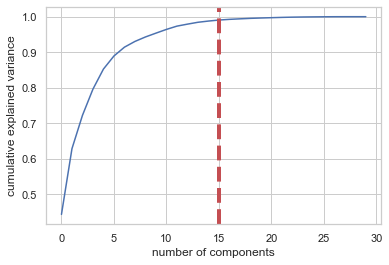

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.444034,0.444034
1,0.628756,0.184723
2,0.722513,0.093757
3,0.796323,0.073809
4,0.852753,0.056430
5,0.889488,0.036735
6,0.914275,0.024788
7,0.930422,0.016147
8,0.942988,0.012566
9,0.953731,0.010743


In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA 
pca_test = PCA(n_components=30)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=15, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

该图显示，在超过 10 个特征之后，我们并未获得太多的解释方差。此 DataFrame 显示了累积方差比（解释了数据的总方差）和解释方差比（每个 PCA 成分说明了多少数据的总方差）。
从上面的 DataFrame 可以看出，当我们使用 PCA 将 30 个预测变量减少到 10 个分量时，我们仍然可以解释 95％以上的方差。其他 20 个分量仅解释了不到 5％的方差，因此 我们可以减少他们的权重。按此逻辑，我们将使用 PCA 将 X_train 和 X_test 的成分数量从 30 个减少到 10 个。我们将这些重新创建的「降维」数据集分配给「X_train_scaled_pca」和「X_test_scaled_pca」。


In [135]:
pca = PCA(n_components=15)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)


n_estimators：随机森林中「树」的数量。
max_features：每个分割处的特征数。
max_depth：每棵树可以拥有的最大「分裂」数。
min_samples_split：在树的节点分裂前所需的最少观察数。
min_samples_leaf：每棵树末端的叶节点所需的最少观察数。
bootstrap：是否使用 bootstrapping 来为随机林中的每棵树提供数据。（bootstrapping 是从数据集中进行替换的随机抽样。）输入特征的随机子集进行抽样，随机子空间法

In [142]:
columns=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']

In [143]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=columns, index=pca_dims)
pca_test_df.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
mean radius,0.232171,-0.204799,-0.029933,0.029410,0.019643,0.027353,-0.102928,-0.026160,-0.247494,0.051552
mean texture,0.103773,-0.062384,0.056580,-0.484350,-0.341320,-0.020457,0.062561,-0.014278,0.038097,0.186641
mean perimeter,0.238436,-0.188484,-0.027390,0.030424,0.025131,0.026009,-0.099564,-0.020313,-0.238888,0.044771
mean area,0.233117,-0.206881,0.008801,0.054678,0.004205,0.006582,-0.000045,-0.040727,-0.210749,0.040656
mean smoothness,0.130060,0.191964,-0.042169,0.341777,-0.225913,-0.268682,-0.153168,0.256392,-0.011250,-0.202736
mean compactness,0.237505,0.169958,-0.058061,0.015711,0.060585,0.004830,-0.054225,0.085780,-0.131393,-0.006082
mean concavity,0.260658,0.043839,0.003202,-0.000921,0.059670,-0.042799,-0.093568,-0.070675,-0.001433,-0.018761
mean concave points,0.259432,-0.035868,-0.023033,0.090385,-0.007832,-0.052738,-0.191092,0.049340,-0.121551,-0.048639
mean symmetry,0.112613,0.200044,0.040065,0.236034,-0.249094,0.376953,-0.166403,0.305346,0.175107,0.634977
mean fractal dimension,0.042506,0.378043,0.000290,0.058643,-0.002649,-0.120721,0.228146,0.279078,-0.169207,-0.096141


In [145]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled_pca, y_train)
rfc.score(X_train_scaled_pca, y_train)# 1.0

c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0

In [137]:
from sklearn.model_selection import RandomizedSearchCV

In [147]:
#超参数设置

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

rs = RandomizedSearchCV(rfc, 
param_dist, 
n_iter = 100, 
cv = 3, 
verbose = 1, 
n_jobs=-1, 
random_state=0)
rs.fit(X_train_scaled_pca, y_train)
rs.best_params_

# {'n_estimators': 700,
# 'min_samples_split': 2,
# 'min_samples_leaf': 2,
# 'max_features': 'log2',
# 'max_depth': 11,
# 'bootstrap': True}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.6min finished
c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 700,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 13,
 'bootstrap': False}

In [148]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
'mean_fit_time', 
'std_fit_time', 
'mean_score_time',
'std_score_time', 
'params', 
'split0_test_score', 
'split1_test_score', 
'split2_test_score', 
'std_test_score'],
axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,700,2,2,log2,11,True,0.943662,1
1,300,2,23,log2,14,False,0.943662,1
2,500,39,18,sqrt,11,False,0.943662,1
3,900,34,18,sqrt,11,True,0.943662,1
4,700,12,2,sqrt,13,False,0.943662,1
5,1000,44,23,log2,12,False,0.943662,1
6,700,23,7,log2,15,False,0.943662,1
7,200,12,2,log2,4,True,0.943662,1
8,500,12,18,sqrt,13,False,0.943662,1
9,500,23,23,sqrt,8,False,0.943662,1


(0.88, 0.92)

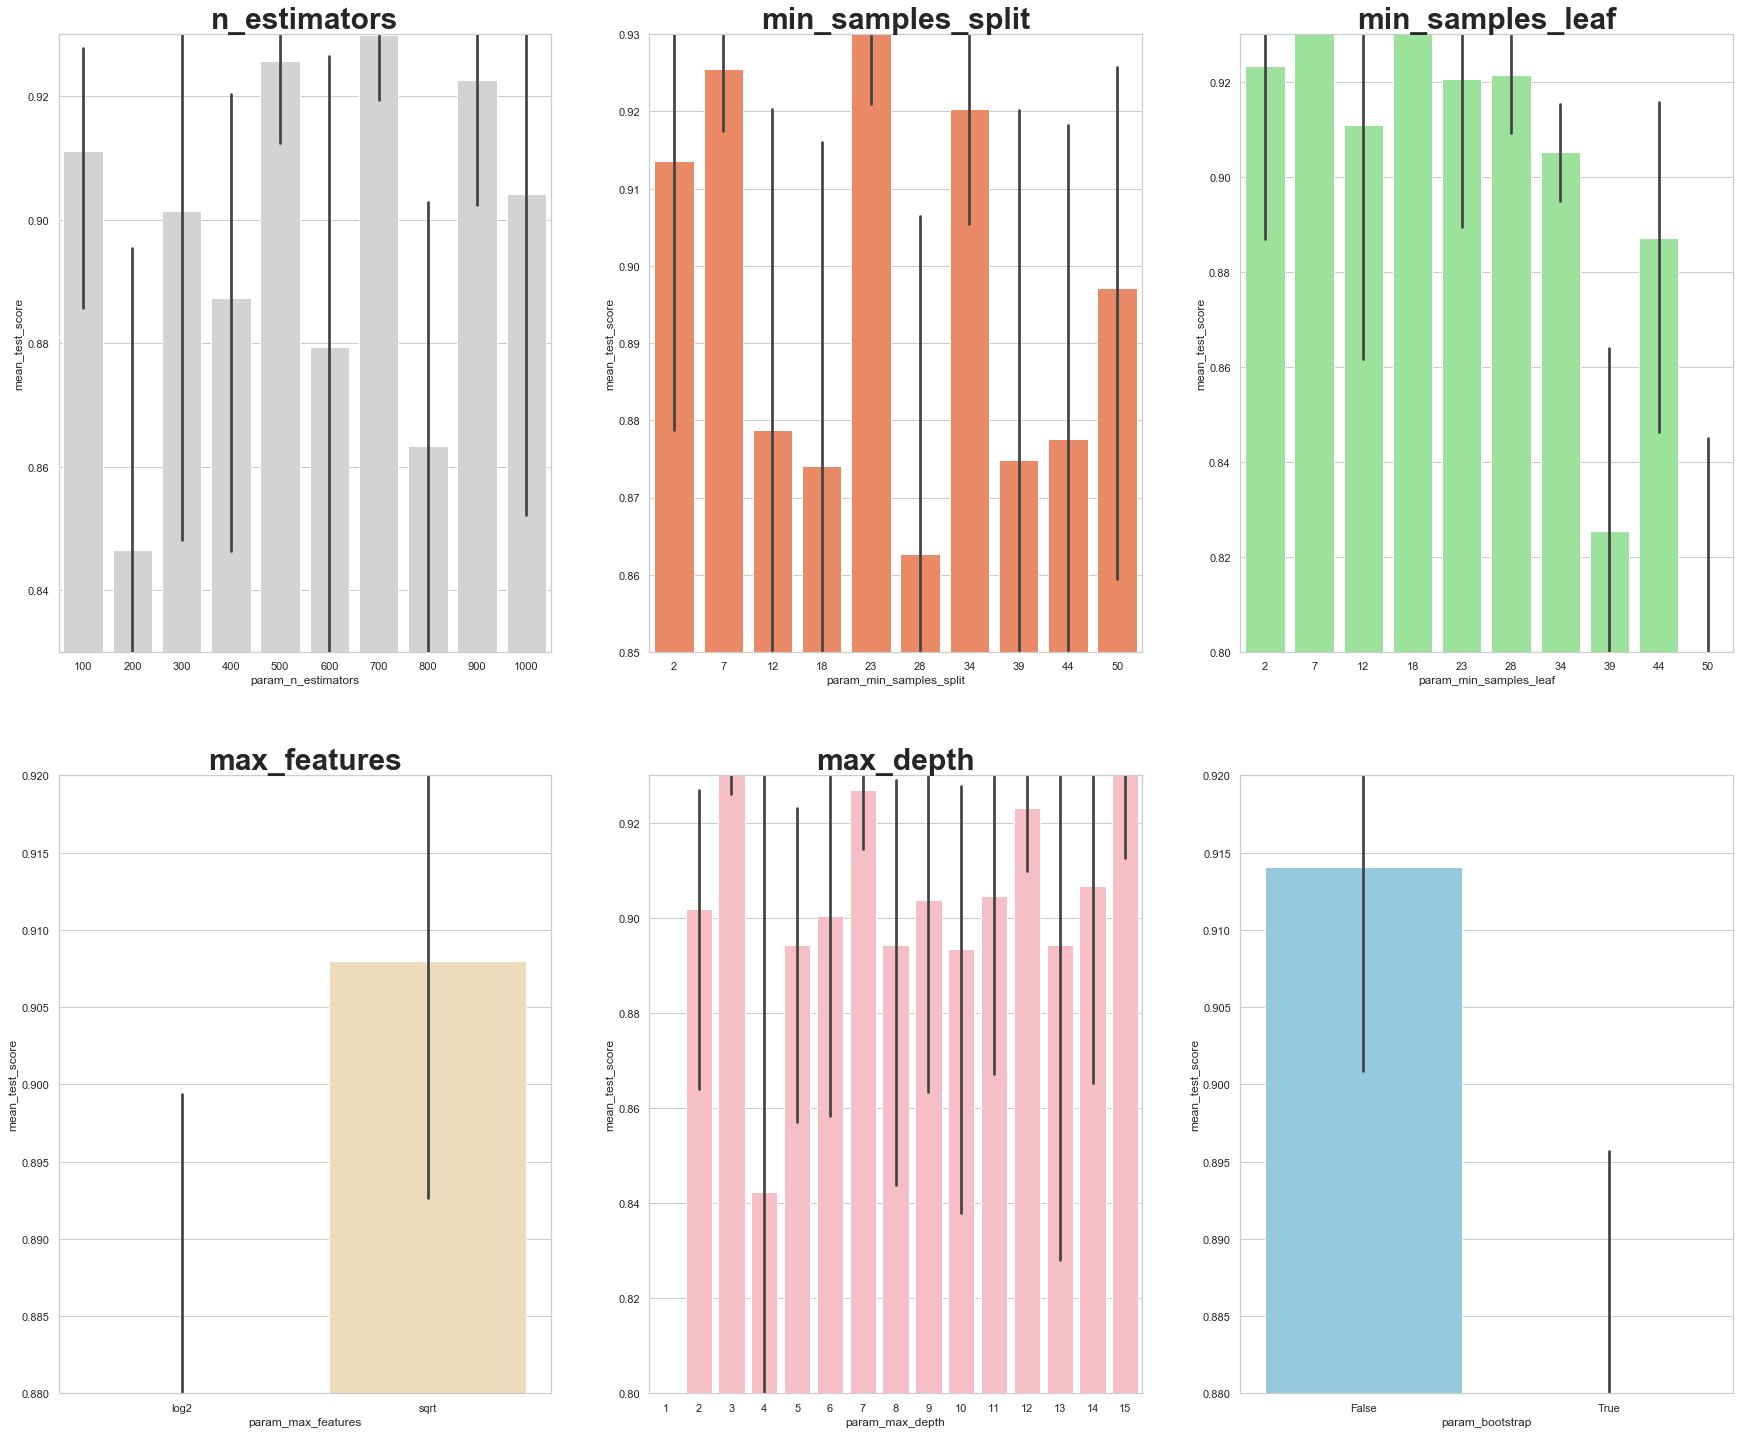

In [151]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.83,.93])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.85,.93])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.80,.93])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.88,.92])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.80,.93])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.88,.92])

In [152]:
#让我们在 x 轴上创建每个超参数的柱状图，并针对每个值制作模型的平均得分，查看平均而言最优的值：

In [154]:
from sklearn.model_selection import GridSearchCV
n_estimators = [300,500,700]
max_features = ['sqrt']
max_depth = [2,3,7,11,15]
min_samples_split = [2,3,4,22,23,24]
min_samples_leaf = [2,3,4,5,6,7]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}
gs = GridSearchCV(rfc, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_scaled_pca, y_train)
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 13.9min finished
c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': False,
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [156]:
# y_pred = rfc.predict(X_test_scaled)
# y_pred_pca = rfc.predict(X_test_scaled_pca)
# y_pred_gs = gs.best_estimator_.predict(X_test_scaled_pca)

In [157]:
from sklearn.metrics import confusion_matrixconf_matrix_
baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_baseline_pca = pd.DataFrame(confusion_matrix(y_test, y_pred_pca), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_tuned_pca = pd.DataFrame(confusion_matrix(y_test, y_pred_gs), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
display('Baseline Random Forest recall score', recall_score(y_test, y_pred))
display(conf_matrix_baseline_pca)
display('Baseline Random Forest With PCA recall score', recall_score(y_test, y_pred_pca))
display(conf_matrix_tuned_pca)
display('Hyperparameter Tuned Random Forest With PCA Reduced Dimensionality recall score', recall_score(y_test, y_pred_gs))

ImportError: cannot import name 'confusion_matrixconf_matrix_' from 'sklearn.metrics' (c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\__init__.py)

In [168]:
model_1=RandomForestClassifier(bootstrap=False,
                               max_depth= 7,
                               max_features= 'sqrt',
                               min_samples_leaf= 2,
                            min_samples_split= 2,
                               n_estimators= 300)


In [169]:
model_1.fit(X_train_scaled,y_train)
prediction=model_1.predict(X_test_scaled )

In [170]:
print('The accuracy of the Random Forests is',metrics.recall_score(prediction,y_test))

The accuracy of the Random Forests is 0.945054945054945
